In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# columns info is extracted from 
# https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
#raw_data = pd.read_csv(data_url,sep= ',', header = None) 

# infromation of columns
# -----------------------------------
# age : age in years
# sex : sex (1 : male , 0: female)
# cp : chest pain type
#        -- Value 1: typical angina
#        -- Value 2: atypical angina
#        -- Value 3: non-anginal pain
#        -- Value 4: asymptomatic
# trestbps : resting blood pressure
# chol : Serum cholestoral in (mg/dl)
# fbs  : fasting blood sugar > 120 mg/dl  (1: true, 0 : false)
# restecg : resting electrocardiographic results
# 	-- Value 0: normal
#       -- Value 1: having ST-T wave abnormality 
#        -- Value 2: showing probable or definite left ventricular hypertrophy
                    
# thalach : maximum heart rate (thal) achieved
# exang   : excercise induced agina (1: yes, 0: no)
# oldpeak : ST depression induced by excercise relative to rest
# slope   : the slopw of the peack excercise ST segment
#       -- Value 1: upsloping
#       -- Value 2: flat
#       -- Value 3: downsloping
# ca  : number of major vessels colored by flouroscopy (value : 0-3)
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# target : the presence of heart disease in the patient
#       value : 0   | not present
#       value : 1-4 | distinguish presence
#--------------------------------------------------
# loading the data from data_url to raw_data set

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names'
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
raw_data = pd.read_csv(data_url,sep= ',', names = columns)

In [3]:
# infromation of the data
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB
None


In [4]:
print('Shape of Dataset:',raw_data.shape)
print('Number of rows:',raw_data.shape[0])
print('Number of columns : ',raw_data.shape[1])

Shape of Dataset: (303, 14)
Number of rows: 303
Number of columns :  14


In [5]:
# checking for null value 
#raw_data.isnull().sum()
# seems like there are no null values in the dataset
print("is there any null value :",raw_data.isnull().values.any())

is there any null value : False


In [6]:
# description of the dataset/features with there 
# count : count of corresponding feature
# mean  : mean value of the corresponding feature
# std   : standard deviation value of corresponding feature
# min   : minimun value of corresponding feature
# max   : maximum  value of corresponding feature
# 25%,50%,75%: percentile (quartile) of each features
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [7]:
# first 10 rows of data
raw_data.head(10)
# random  10 rows of data
#raw_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [8]:
# lets change the heart disease types 1to 4 to 1
raw_data.loc[raw_data['target'] > 0 , 'target'] =1

# lets catergories the age into 
# 1: young age (29-40) , 
# 2: middle age (40-55) , and 
# 3: oldage(<50)
raw_data.loc[(raw_data.age >= 29) & (raw_data.age < 40), 'age'] = 1
raw_data.loc[(raw_data.age >= 40) & (raw_data.age < 55) , 'age'] = 2
raw_data.loc[(raw_data.age >= 55) , 'age'] = 3

# convert to number
raw_data.ca = pd.to_numeric(raw_data.ca,errors='coerce').fillna(0)
raw_data.thal = pd.to_numeric(raw_data.thal,errors='coerce').fillna(0)
#raw_data.describe()

In [9]:
raw_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
275,3.0,1.0,1.0,170.0,227.0,0.0,2.0,155.0,0.0,0.6,2.0,0.0,7.0,0
207,2.0,1.0,4.0,144.0,200.0,0.0,2.0,126.0,1.0,0.9,2.0,0.0,7.0,1
77,2.0,0.0,3.0,140.0,308.0,0.0,2.0,142.0,0.0,1.5,1.0,1.0,3.0,0
6,3.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
78,2.0,1.0,2.0,130.0,245.0,0.0,2.0,180.0,0.0,0.2,2.0,0.0,3.0,0
197,2.0,0.0,4.0,138.0,236.0,0.0,2.0,152.0,1.0,0.2,2.0,0.0,3.0,0
277,1.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0,0
159,3.0,1.0,3.0,118.0,277.0,0.0,0.0,151.0,0.0,1.0,1.0,1.0,7.0,0
69,2.0,1.0,3.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0,0.0,3.0,1
66,3.0,1.0,3.0,140.0,185.0,0.0,2.0,155.0,0.0,3.0,2.0,0.0,3.0,1


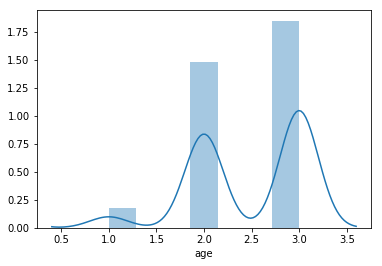

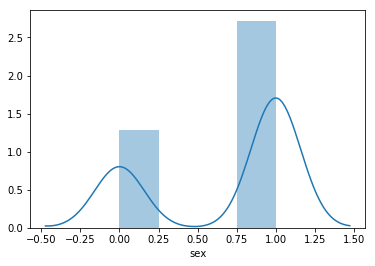

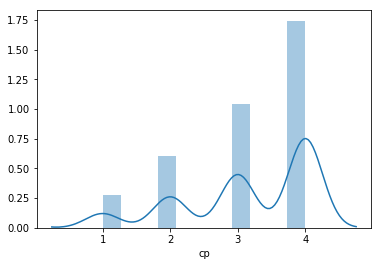

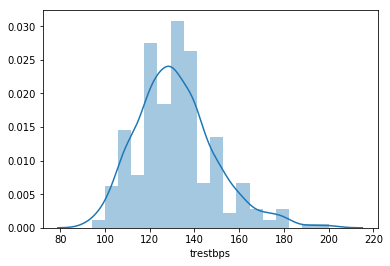

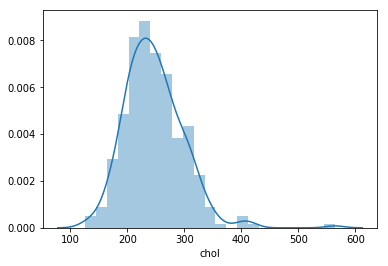

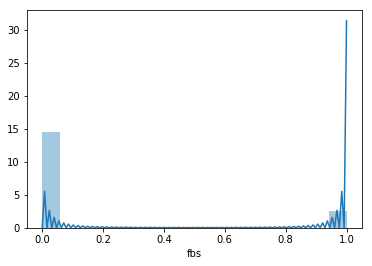

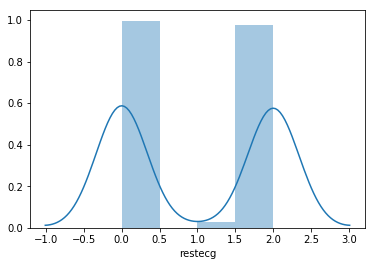

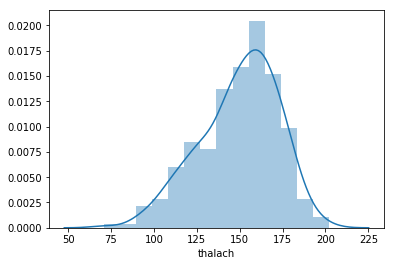

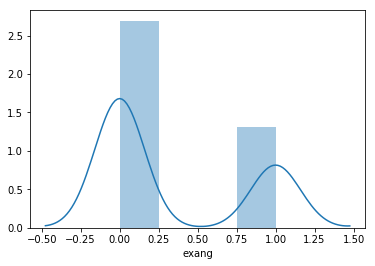

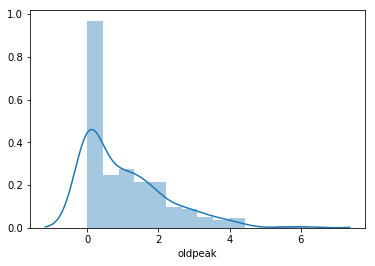

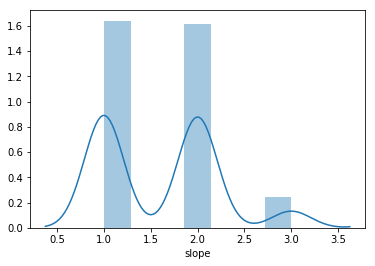

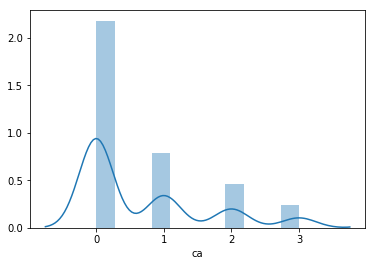

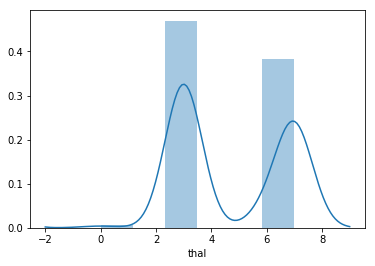

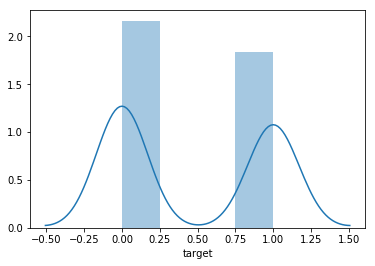

In [10]:
for feature in columns:
    #if feature not in ['thal','ca']:        
    sns.distplot(raw_data[feature])
    plt.show()

In [11]:
# correlation values between the features
raw_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.066873,0.105149,0.290151,0.200447,0.101635,0.148772,-0.358376,0.126623,0.226940,0.189950,0.310492,0.190534,0.274652
sex,-0.066873,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.378155,0.276816
cp,0.105149,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.254161,0.414446
trestbps,0.290151,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134311,0.150825
chol,0.200447,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.025190,0.085164
fbs,0.101635,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.053608,0.025264
restecg,0.148772,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.023822,0.169202
thalach,-0.358376,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.263384,-0.417167
exang,0.126623,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.316134,0.431894
oldpeak,0.226940,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.341416,0.424510


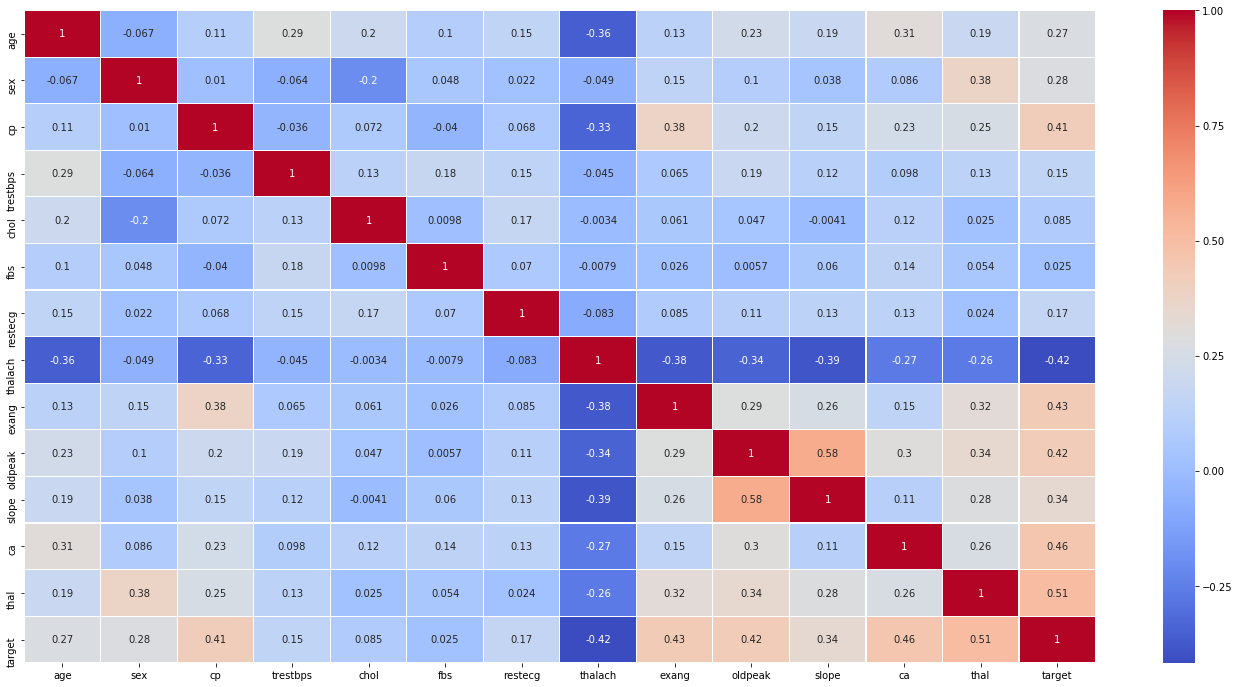

In [12]:
# Exploratory Plot of Data using heatmap 
plt.figure(figsize=(24,12))
sns.heatmap(raw_data.corr(),cmap='coolwarm', annot = True, linewidths=.1)
plt.show()

In [13]:
# drop trestbps(.16),chol(.071),fbs(0.059),restecg(.18),thalach(-0.42)
newdf = raw_data.drop(columns = ['trestbps','chol','fbs','restecg','thalach'])
#newdf.head()

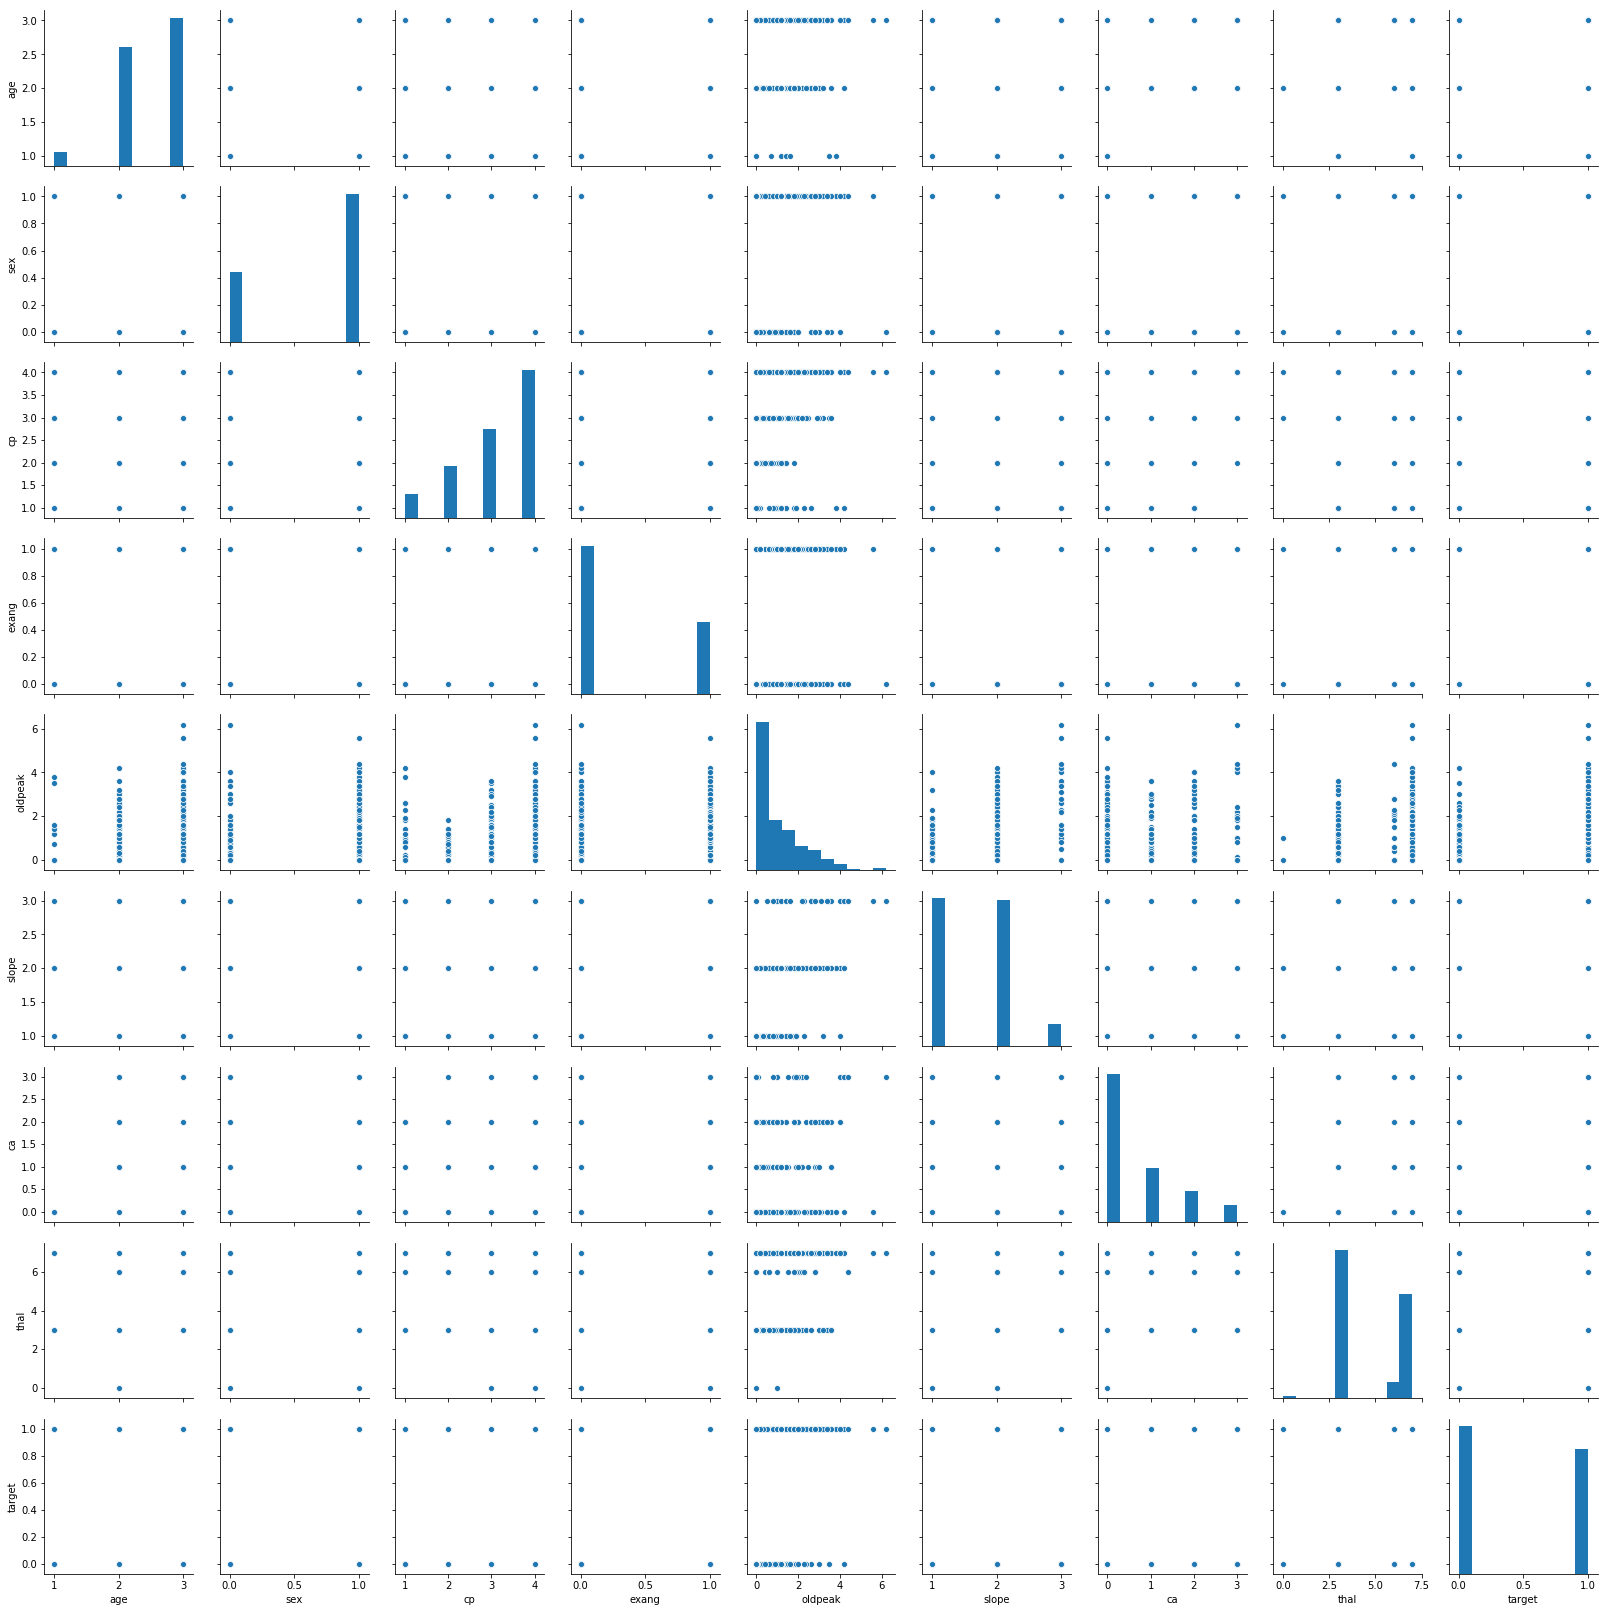

In [14]:
#sns.pairplot(newdf, hue= 'age')
sns.pairplot(newdf)
plt.show()

In [15]:
# modeling
# drop the target data choos
data_X = newdf.drop('target',axis=1)
data_Y = newdf['target']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.svm import SVC
#from sklearn.metrics import roc_curve, auc

# normalize data
normal_data_X = (data_X - np.min(data_X)) / (np.max(data_X) - np.min(data_X)).values

train_X,test_X,train_y,test_y =train_test_split(normal_data_X,data_Y,random_state=0,test_size=0.2)
print('test_X',test_X.shape)

test_X (61, 8)


In [16]:
from sklearn.decomposition import PCA
pca=PCA().fit(train_X)
print(pca.explained_variance_ratio_)
print(train_X.columns.values.tolist())
print(pca.components_)


[0.3328994  0.22561325 0.12572538 0.10381059 0.08235663 0.06308507
 0.04632021 0.02018947]
['age', 'sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
[[ 0.14587616  0.36770605  0.30055603  0.71874998  0.1680834   0.24575312
   0.20505939  0.32539354]
 [ 0.20317775 -0.88428136  0.21058548  0.28066822  0.07066104  0.14588694
   0.11083654 -0.12281554]
 [ 0.44865288  0.05200452  0.02764198 -0.49751721  0.16313845  0.16163242
   0.68058641  0.17827402]
 [ 0.01728584 -0.03330065 -0.38274165 -0.11173473  0.24742566  0.79740909
  -0.35634126  0.12472624]
 [ 0.52360691  0.01996963 -0.7286121   0.33189342 -0.11314443 -0.24757665
   0.03627804 -0.09484842]
 [-0.60590361 -0.01115514 -0.34699604  0.18460318  0.12483247  0.14228299
   0.57375175 -0.33653102]
 [ 0.30690374  0.2801562   0.25792156  0.00555609  0.00200773  0.23077182
  -0.06576995 -0.83855998]
 [ 0.01942857  0.00382107 -0.01609976 -0.01879738  0.92224321 -0.34862849
  -0.14372227 -0.07915132]]


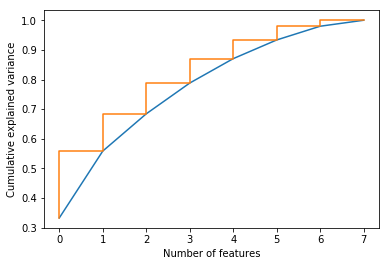

In [17]:
cumulative_data = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_data)
plt.step([i for i in range(len(cumulative_data))],cumulative_data)
plt.xlabel('Number of features')
plt.ylabel('Cumulative explained variance')
plt.show()

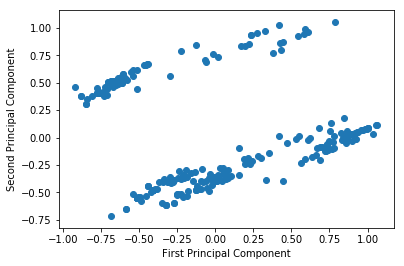

In [18]:
pca = PCA(n_components=4)
pca.fit(train_X)
reduced_train_data = pca.transform(train_X)

plt.scatter(reduced_train_data[:, 0], reduced_train_data[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [19]:
# we will store the accuracies of various models
accuracies =  {} 
# Support Vector Classifier
from sklearn import svm
svm_model = svm.SVC(C=1,kernel='poly',gamma='auto')
svm_model.fit(train_X, train_y) 
svm_prediction = svm_model.predict(test_X)
svm_accuracy = svm_model.score(test_X,test_y)
accuracies['SVC'] = svm_accuracy
print("Testing Accuracty of SVC Model : ",svm_accuracy)


Testing Accuracty of SVC Model :  0.8360655737704918


In [20]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(train_X, train_y)
dtc_prediction = dtc_model.predict(test_X)
dtc_accuracy = dtc_model.score(test_X,test_y)
accuracies['DecisionTreeClassifier'] = dtc_accuracy
print("Testing Accuracty of DecisionTreeClassifier Model : ",dtc_accuracy)

Testing Accuracty of DecisionTreeClassifier Model :  0.7540983606557377


In [21]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_model.fit(train_X, train_y)
rf_prediction = rf_model.predict(test_X)
rf_accuracy = rf_model.score(test_X,test_y)
accuracies['RandomForestClassifier'] = rf_accuracy
print("Testing Accuracty of RandomForestClassifier Model : ",rf_accuracy)

Testing Accuracty of RandomForestClassifier Model :  0.7540983606557377


In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(train_X, train_y)
lr_prediction = lr_model.predict(test_X)
lr_accuracy = lr_model.score(test_X,test_y)
accuracies['LogisticRegression'] = lr_accuracy
print("Testing Accuracty of RandomForestClassifier Model : ",lr_accuracy)

Testing Accuracty of RandomForestClassifier Model :  0.7868852459016393


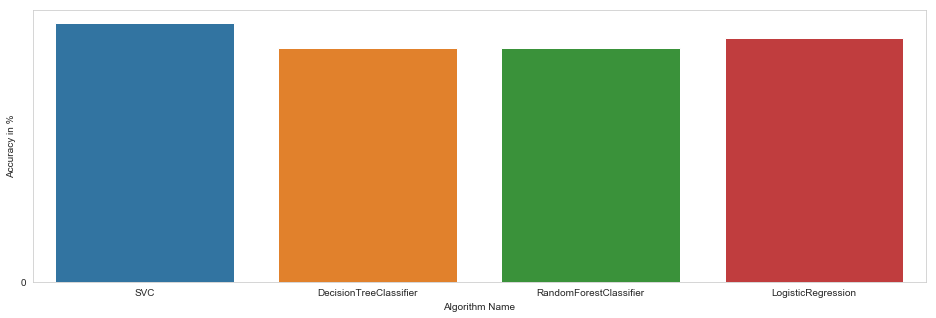

In [23]:
# we will plot accuracy plots of algorithms
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=list(accuracies.values()),x=list(accuracies.keys()))
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(test_y,svm_prediction)
cm_dtc = confusion_matrix(test_y,dtc_prediction)
cm_rf  = confusion_matrix(test_y,rf_prediction)
cm_lr  = confusion_matrix(test_y,lr_prediction)

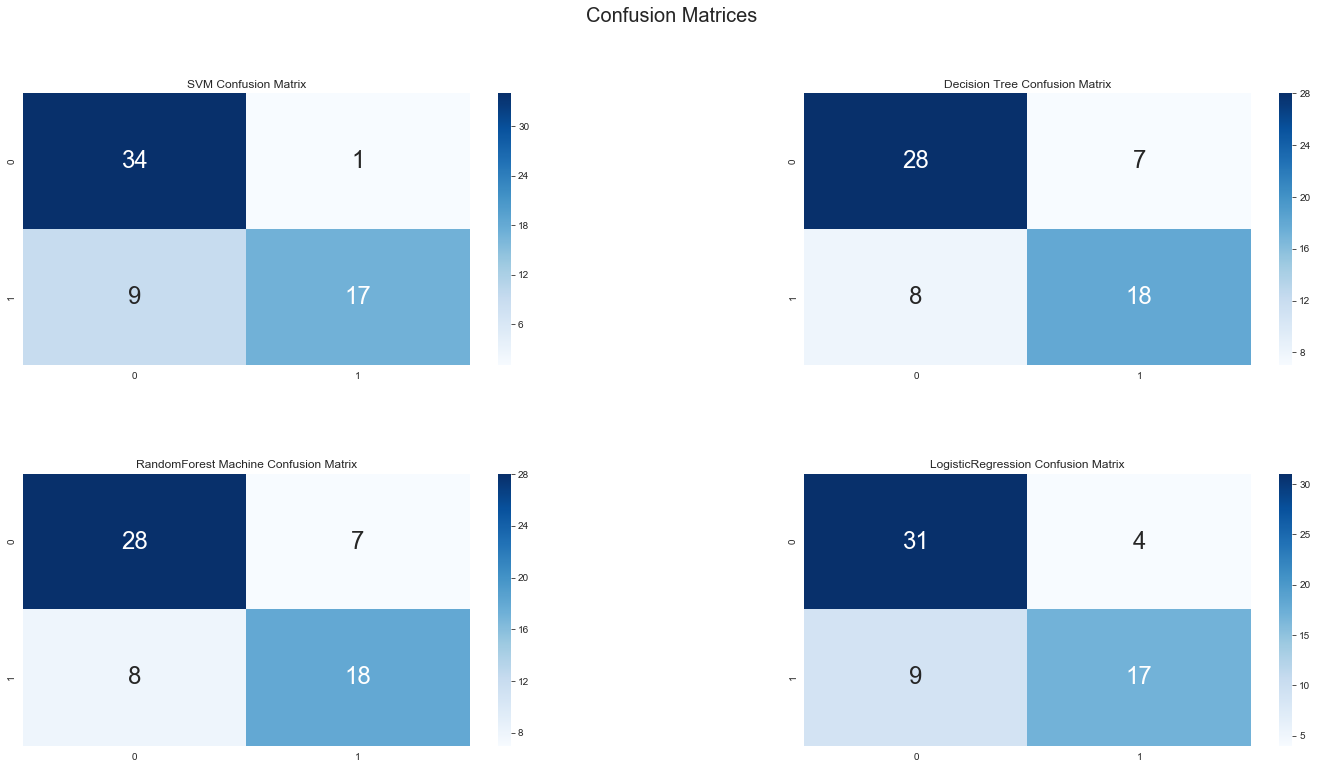

In [25]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=20)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dtc,cmap="Blues",cbar=True,annot=True, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("RandomForest Machine Confusion Matrix")
sns.heatmap(cm_rf,cmap="Blues",cbar=True,annot=True, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("LogisticRegression Confusion Matrix")
sns.heatmap(cm_lr,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 24})